#**探索的データ分析授業前課題1　アヤメの分析**


「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。


Iris setosa - Wikipedia
Iris virgicolor - Wikipedia
Iris virginica - Wikipedia

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


**1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。**

##**問題1　データの取得**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris_data = load_iris()
#print(iris_data)

X = pd.DataFrame(iris_data["data"],columns=["sepal_length","sepal_width","petal_length","petal_width"])
#print(X)
y = pd.DataFrame(iris_data["target"],columns=["Species"])
#print(y)

##**問題2　データの結合**

In [2]:
df = pd.concat([X,y],axis=1)

In [3]:
#print(df)

##**問題3　データの確認**

先頭から4番目までのサンプルを表示させ、各特徴
量がどういったものかを見る。（数値データか文字データかなど）

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


ラベルごとのサンプル数の合計を出力する。

In [5]:
df.sum()

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

特徴量に欠損値があるかを確認する。

In [6]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


特徴量の平均値と標準偏差、四分位数を一度に表示させる

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**テスト**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
df.value_counts

<bound method DataFrame.value_counts of      sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

##**問題4　irisデータセット自体の調査**


[irisデータセットについて](http://taustation.com/iris-dataset/)

[irisについて](https://tsutatsutatsuta.hatenadiary.org/entry/20121206/1354737461)


##**問題5　必要なデータを抽出**

sepal_widthの列を３つの異なる方法で抽出する

In [10]:
df.loc[:,"sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [11]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [12]:
df["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

50番目から99番目までのデータを抽出する

In [13]:
df.iloc[50:100,]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


petal_lengthの列の50番目から99番目までのデータを抽出する

In [14]:
df.iloc[50:99,0]

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
Name: sepal_length, dtype: float64

petal_widthの値が0.2のデータを抽出する

In [15]:
df.query("petal_width == 0.2")

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


##**問題6　図の作成**

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns


#print(X)

##**円グラフ**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


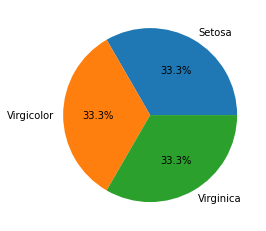

In [70]:
df_num = df[["Species"]]
#print(df_num)
setosa_data = ((df_num == 0).sum())
virgicolor_data = ((df_num == 1).sum())
virginica_data = ((df_num == 2).sum())

list_num = [setosa_data, virgicolor_data, virgicolor_data]
label= ["Setosa","Virgicolor","Virginica"]
plt.pie(list_num,labels=label,autopct="%.1f%%")
plt.show()

##**箱ひげ図**

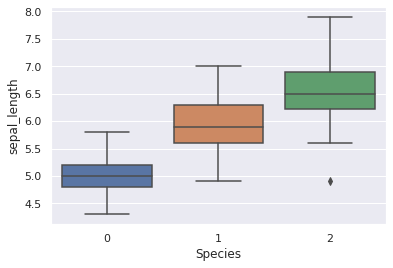

In [85]:
import seaborn as sns
sns.set(style="darkgrid")

sns.boxplot(data=df, x="Species", y= "sepal_length")
plt.show()

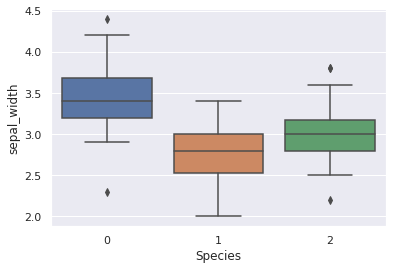

In [87]:
sns.boxplot(data=df, x="Species", y= "sepal_width")
plt.show()

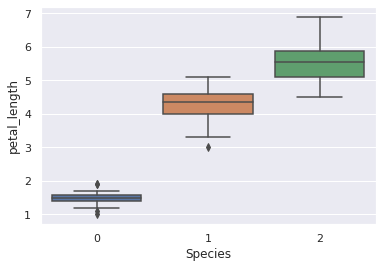

In [90]:
sns.boxplot(data=df, x="Species", y= "petal_length")
plt.show()

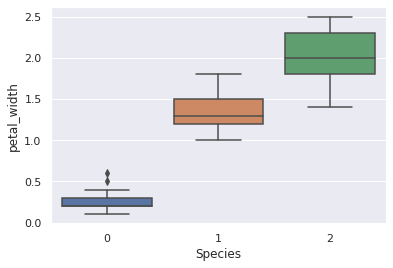

In [91]:
sns.boxplot(data=df, x="Species", y= "petal_width")
plt.show()

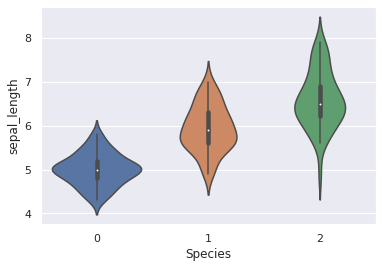

In [92]:
sns.violinplot(data=df, x="Species", y= "sepal_length")
plt.show()

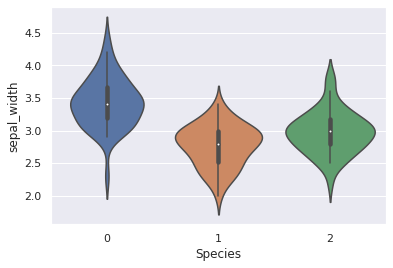

In [93]:
sns.violinplot(data=df, x="Species", y= "sepal_width")
plt.show()

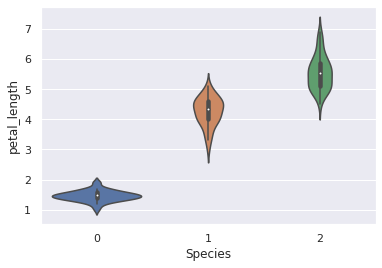

In [94]:
sns.violinplot(data=df, x="Species", y= "petal_length")
plt.show()

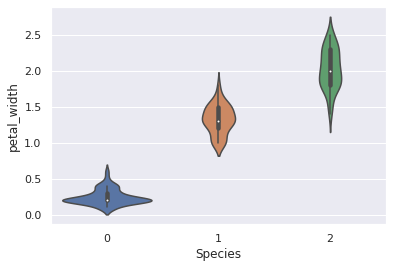

In [95]:
sns.violinplot(data=df, x="Species", y= "petal_width")
plt.show()

##**箱ひげ図とバイオリン図の違い**<br>

箱ひげ図は最大値、最小値、四分位数の情報を表現したグラフ　データの分布を大雑把に把握できる

数値データの分布をより可視化・比較したい場合は、バイオリン図を使うのが良い→データの分布がそのまま図に現れているのでより正確に比較が可能

##**問題7　特徴量間の関係の確認**

##***sepal_length*と*sepal_widthの関係***

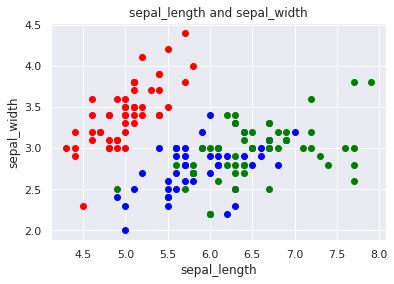

In [140]:
df2 = df.copy()
df_setosa = df2[df2["Species"].isin(["0"])]
df_virgicolor = df2[df2["Species"].isin(["1"])]
df_virginica = df2[df2["Species"].isin(["2"])]

x1 = df_setosa.iloc[:,0]
y1 = df_setosa.iloc[:,1]

x2 = df_virgicolor.iloc[:,0]
y2 = df_virgicolor.iloc[:,1]

x3 = df_virginica.iloc[:,0]
y3 = df_virginica.iloc[:,1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x1, y1, c="red")
ax.scatter(x2, y2, c="blue")
ax.scatter(x3, y3, c="green")

ax.set_title('sepal_length and sepal_width')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

fig.show()



##***sepal_length*と*petal_lengthの関係***

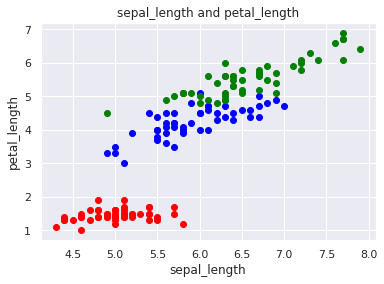

In [143]:
df2 = df.copy()
df_setosa = df2[df2["Species"].isin(["0"])]
df_virgicolor = df2[df2["Species"].isin(["1"])]
df_virginica = df2[df2["Species"].isin(["2"])]

x1 = df_setosa.iloc[:,0]
y1 = df_setosa.iloc[:,2]

x2 = df_virgicolor.iloc[:,0]
y2 = df_virgicolor.iloc[:,2]

x3 = df_virginica.iloc[:,0]
y3 = df_virginica.iloc[:,2]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x1, y1, c="red")
ax.scatter(x2, y2, c="blue")
ax.scatter(x3, y3, c="green")

ax.set_title('sepal_length and petal_length')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')

fig.show()


##***sepal_length*と*petal_widhtの関係***

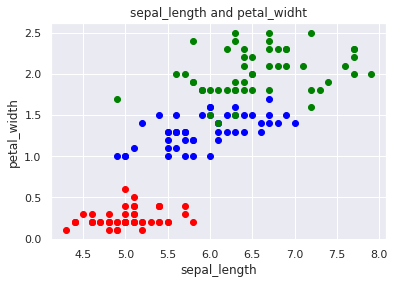

In [144]:
df2 = df.copy()
df_setosa = df2[df2["Species"].isin(["0"])]
df_virgicolor = df2[df2["Species"].isin(["1"])]
df_virginica = df2[df2["Species"].isin(["2"])]

x1 = df_setosa.iloc[:,0]
y1 = df_setosa.iloc[:,3]

x2 = df_virgicolor.iloc[:,0]
y2 = df_virgicolor.iloc[:,3]

x3 = df_virginica.iloc[:,0]
y3 = df_virginica.iloc[:,3]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x1, y1, c="red")
ax.scatter(x2, y2, c="blue")
ax.scatter(x3, y3, c="green")

ax.set_title('sepal_length and petal_widht')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_width')

fig.show()

##***sepal_width*と*petal_lengthの関係***

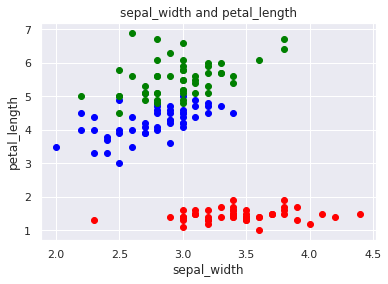

In [145]:
x1 = df_setosa.iloc[:,1]
y1 = df_setosa.iloc[:,2]

x2 = df_virgicolor.iloc[:,1]
y2 = df_virgicolor.iloc[:,2]

x3 = df_virginica.iloc[:,1]
y3 = df_virginica.iloc[:,2]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x1, y1, c="red")
ax.scatter(x2, y2, c="blue")
ax.scatter(x3, y3, c="green")

ax.set_title('sepal_width and petal_length')
ax.set_xlabel('sepal_width')
ax.set_ylabel('petal_length')

fig.show()


##***sepal_width*と*petal_widthの関係***

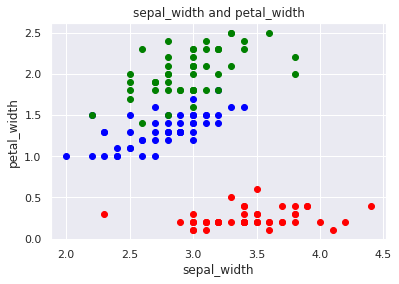

In [146]:
x1 = df_setosa.iloc[:,1]
y1 = df_setosa.iloc[:,3]

x2 = df_virgicolor.iloc[:,1]
y2 = df_virgicolor.iloc[:,3]

x3 = df_virginica.iloc[:,1]
y3 = df_virginica.iloc[:,3]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x1, y1, c="red")
ax.scatter(x2, y2, c="blue")
ax.scatter(x3, y3, c="green")

ax.set_title('sepal_width and petal_width')
ax.set_xlabel('sepal_width')
ax.set_ylabel('petal_width')

fig.show()

##***petal_length*と*petal_widthの関係***

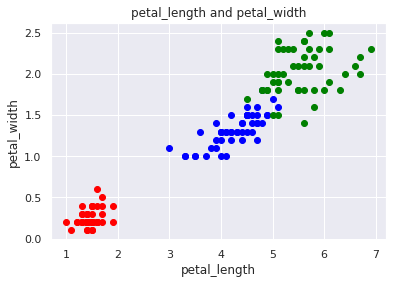

In [148]:
x1 = df_setosa.iloc[:,2]
y1 = df_setosa.iloc[:,3]

x2 = df_virgicolor.iloc[:,2]
y2 = df_virgicolor.iloc[:,3]

x3 = df_virginica.iloc[:,2]
y3 = df_virginica.iloc[:,3]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x1, y1, c="red")
ax.scatter(x2, y2, c="blue")
ax.scatter(x3, y3, c="green")

ax.set_title('petal_length and petal_width')
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')

fig.show()

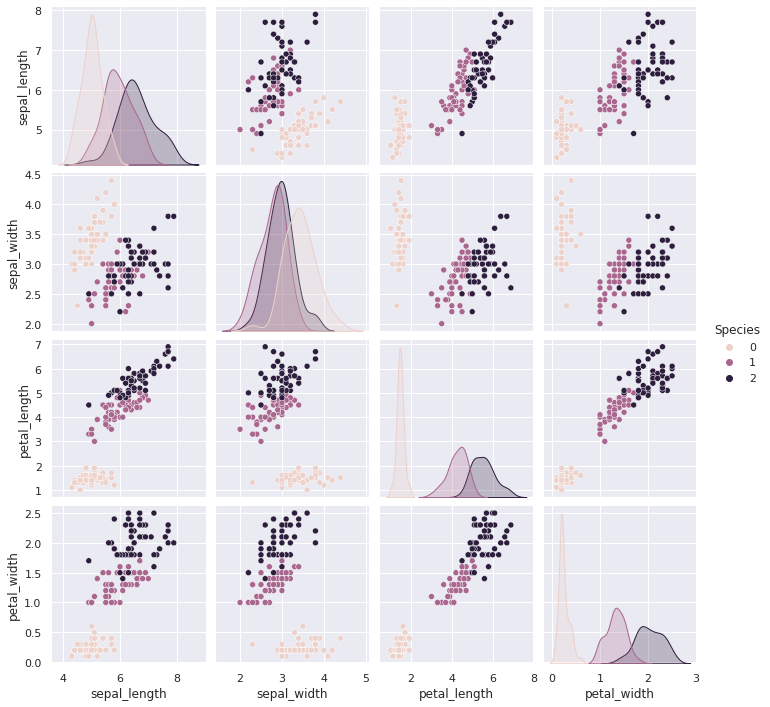

In [153]:
sns.pairplot(df, hue='Species')
plt.show()

##**４つの特徴量に関する相関係数行列を作る**

In [160]:
df = df.iloc[:,:4]
corr_mat = df.corr()
corr_mat


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


##**相関係数行列のヒートマップを作る**

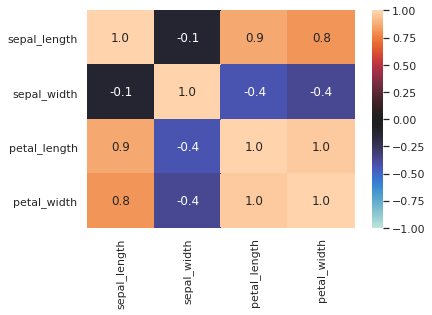

In [161]:
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

##**問題8　考察**<br>
petal_widthとpetal_lengthのサイズを見ることが一番判別しやすい。*setosa*はほぼ識別できるが、*virgicolor*と*virginica*はデータの被りがあるので慎重に識別した方が良い<br>
sepal_lengthとsepal_widthはデータの数値が近いため識別の参考にはならないと思われる<br>
